In [1]:
import geopandas as gpd
archive = gpd.read_file("https://planet-snowcover-archive.s3-us-west-2.amazonaws.com/planet-archive-catalog.geojson")

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [12]:
archive

,_links._self,_links.assets,_links.thumbnail,properties.acquired,properties.anomalous_pixels,properties.clear_confidence_percent,properties.clear_percent,properties.cloud_cover,properties.cloud_percent,properties.columns,...,properties.strip_id,properties.sun_azimuth,properties.sun_elevation,properties.updated,properties.usable_data,properties.view_angle,properties.visible_confidence_percent,properties.visible_percent,type,geometry
0,https://api.planet.com/data/v1/item-types/PSSc...,https://api.planet.com/data/v1/item-types/PSSc...,https://tiles.planet.com/data/v1/item-types/PS...,2017-01-25T17:59:25,0.16,98.0,26,0.08,0,9058,...,380850,145.3,25.6,2019-04-10T19:30:36,0.0,0.1,85.0,100.0,Feature,"POLYGON ((-119.51362 37.78657, -119.80089 37.8..."
1,https://api.planet.com/data/v1/item-types/PSSc...,https://api.planet.com/data/v1/item-types/PSSc...,https://tiles.planet.com/data/v1/item-types/PS...,2017-01-25T17:59:26,0.21,98.0,29,0.21,0,9069,...,380850,145.2,25.6,2019-04-10T19:30:45,0.0,0.1,89.0,100.0,Feature,"POLYGON ((-119.53226 37.71917, -119.81963 37.7..."
2,https://api.planet.com/data/v1/item-types/PSSc...,https://api.planet.com/data/v1/item-types/PSSc...,https://tiles.planet.com/data/v1/item-types/PS...,2017-01-25T17:59:27,0.22,99.0,39,0.43,0,9081,...,380850,145.2,25.7,2019-04-10T19:30:41,0.0,0.1,93.0,100.0,Feature,"POLYGON ((-119.55117 37.65188, -119.83829 37.7..."
3,https://api.planet.com/data/v1/item-types/PSSc...,https://api.planet.com/data/v1/item-types/PSSc...,https://tiles.planet.com/data/v1/item-types/PS...,2017-01-25T17:59:28,0.09,99.0,66,0.49,0,9070,...,380850,145.2,25.7,2019-04-10T19:30:48,0.0,0.1,96.0,100.0,Feature,"POLYGON ((-119.57018 37.58431, -119.85669 37.6..."
4,https://api.planet.com/data/v1/item-types/PSSc...,https://api.planet.com/data/v1/item-types/PSSc...,https://tiles.planet.com/data/v1/item-types/PS...,2017-01-25T17:59:29,0.08,99.0,77,0.60,1,9047,...,380850,145.1,25.8,2019-04-10T19:30:39,0.0,0.1,92.0,99.0,Feature,"POLYGON ((-119.58877 37.51561, -119.87493 37.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22136,https://api.planet.com/data/v1/item-types/PSSc...,https://api.planet.com/data/v1/item-types/PSSc...,https://tiles.planet.com/data/v1/item-types/PS...,2019-07-31T18:22:23,0.00,95.0,96,0.01,0,8957,...,2564215,124.7,60.1,2019-08-01T12:58:39,NaN,0.1,84.0,100.0,Feature,"POLYGON ((-119.43005 38.11758, -119.71629 38.1..."
22137,https://api.planet.com/data/v1/item-types/PSSc...,https://api.planet.com/data/v1/item-types/PSSc...,https://tiles.planet.com/data/v1/item-types/PS...,2019-07-31T18:22:24,0.00,97.0,99,0.01,0,8962,...,2564215,124.5,60.1,2019-08-01T12:58:20,NaN,0.0,73.0,100.0,Feature,"POLYGON ((-119.44760 38.05224, -119.73351 38.1..."
22138,https://api.planet.com/data/v1/item-types/PSSc...,https://api.planet.com/data/v1/item-types/PSSc...,https://tiles.planet.com/data/v1/item-types/PS...,2019-07-31T18:22:25,0.00,99.0,100,0.00,0,8967,...,2564215,124.4,60.2,2019-08-01T12:58:54,NaN,0.0,71.0,100.0,Feature,"POLYGON ((-119.46509 37.98671, -119.75099 38.0..."
22139,https://api.planet.com/data/v1/item-types/PSSc...,https://api.planet.com/data/v1/item-types/PSSc...,https://tiles.planet.com/data/v1/item-types/PS...,2019-07-31T18:22:26,0.01,99.0,100,0.00,0,8987,...,2564215,124.3,60.2,2019-08-01T12:59:52,NaN,0.0,74.0,100.0,Feature,"POLYGON ((-119.48271 37.92060, -119.76905 37.9..."


In [15]:
from shapely.geometry import shape
geom = [shape(i) for i in archive['geometry']]
areas=gpd.GeoDataFrame({'geometry':geom})

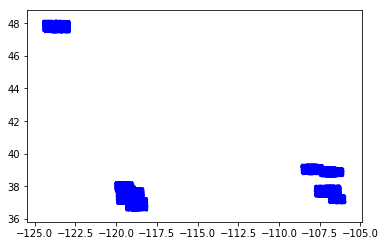

In [19]:
ax = areas.plot(color='blue')

In [28]:
import contextily as ctx
import geoplot

In [32]:
%matplotlib inline
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
ctx.add_basemap(ax)
ctx

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/contextily/tile.py:629: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


<module 'contextily' from '/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/contextily/__init__.py'>

<Figure size 432x288 with 0 Axes>

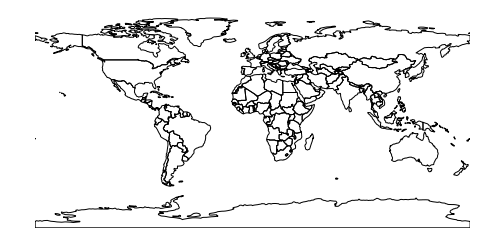

In [29]:
geoplot.polyplot(world, figsize=(8, 4))

In [35]:
areas.crs = 4326
areas.crs = 'epsg:4326'
areas.crs = {'init': 'epsg:4326', 'no_defs': True}

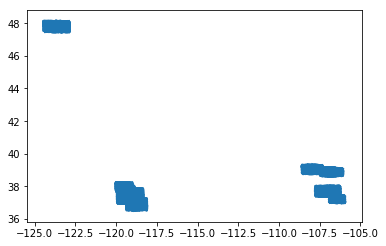

In [36]:
areas.plot()

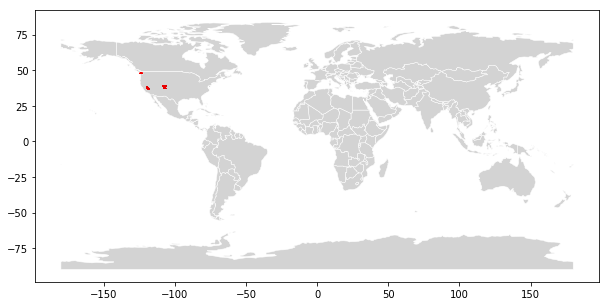

In [48]:
# Note: this code sample requires geoplot>=0.4.0
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
areas.plot(markersize=50, color='red', ax=ax)
#ax.axis('off')

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  app.launch_new_instance()


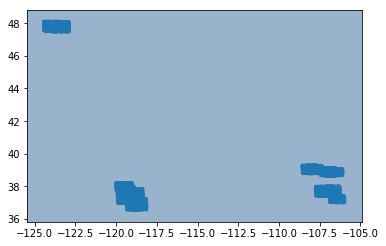

In [51]:
add_basemap(areas.plot(), zoom=10)

In [50]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/{z}/{x}/{y}.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))